In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [6]:
data = pd.read_csv('/home/serch/personal/meli_challenge/data/HousingData.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [8]:
data.shape

(506, 14)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [10]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


(array([360.,   0.,   0.,  10.,   0.,   2.,  34.,  10.,   2.,   9.,   3.,
          0.,   6.,   6.,   0.,   3.,   3.,   0.,   4.,   0.,   0.,   3.,
          3.,   0.,  16.,   2.,   0.,   5.,   4.,   1.]),
 array([  0.        ,   3.33333333,   6.66666667,  10.        ,
         13.33333333,  16.66666667,  20.        ,  23.33333333,
         26.66666667,  30.        ,  33.33333333,  36.66666667,
         40.        ,  43.33333333,  46.66666667,  50.        ,
         53.33333333,  56.66666667,  60.        ,  63.33333333,
         66.66666667,  70.        ,  73.33333333,  76.66666667,
         80.        ,  83.33333333,  86.66666667,  90.        ,
         93.33333333,  96.66666667, 100.        ]),
 <BarContainer object of 30 artists>)

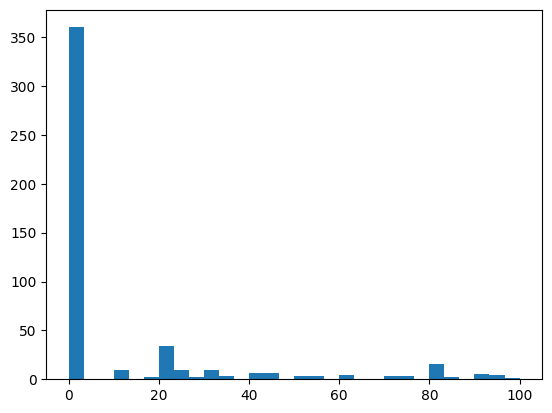

In [27]:
plt.hist(data['ZN'], bins=30)

In [19]:
data_without_null = data[~data.isnull().any(axis=1)]
data_without_null.shape

(394, 14)

Pruebas pipeline

In [21]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  RobustScaler
from sklearn.impute import SimpleImputer



In [22]:
# Separar features y target
X = data.drop('MEDV', axis=1)
y = data['MEDV']

# Definir columnas
numeric_features = ['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 
                    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
categorical_features = ['CHAS']

# Pipeline de preprocesamiento
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline([
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', RobustScaler())  # o StandardScaler
        ]), numeric_features),
        ('cat', Pipeline([
            ('imputer', SimpleImputer(strategy='most_frequent')),
            # No escalar variables categóricas dummy
        ]), categorical_features)
    ]
)



In [23]:
# Aplicar transformación
X_transformed = preprocessor.fit_transform(X)

In [24]:
X_transformed

array([[-0.090771  , 18.        , -0.57164988, ...,  0.26190191,
        -0.69057816,  0.        ],
       [-0.08306962,  0.        , -0.20294345, ...,  0.26190191,
        -0.24518201,  0.        ],
       [-0.08307696,  0.        , -0.20294345, ...,  0.06667466,
        -0.79229122,  0.        ],
       ...,
       [-0.07079657,  0.        ,  0.17350891, ...,  0.26190191,
        -0.61991435,  0.        ],
       [-0.0528805 ,  0.        ,  0.17350891, ...,  0.09641444,
        -0.52997859,  0.        ],
       [-0.07569478,  0.        ,  0.17350891, ...,  0.26190191,
        -0.38008565,  0.        ]], shape=(506, 13))